# Project Report

## <mark><font color="blue">Title
## Heart Disease Classification

## <mark><font color="blue"> Introduction

### Background Information and Aim of the Project

A heart attack, also known as a myocardial infarction, occurs when blood flow to a part of the heart is blocked, usually by a blood clot. This can cause damage to the heart muscle, which can be life-threatening if not treated promptly. Risk factors for heart attack include smoking, high blood pressure, high cholesterol, obesity, physical inactivity, family history of heart disease, and diabetes. It's important to make lifestyle changes, such as quitting smoking, eating a healthy diet, exercising regularly, and managing any underlying medical conditions, to reduce your risk of heart attack. Many recent research has been using medical data and machine learning to help with the diagnoses of heart disease (Shouman et al., 2012, Mohan et al., 2019).


Our aim with this project is to build a predictive model that can identify individuals at a high (`target = 1`) or low (`target = 0`) risk of developing heart disease using the KNN classification model with the predictors `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.

### About the Dataset and Its Variables

This data set is collected from the Hungarian Institute of Cardiology, Budapest. It was donated in 1988 for analysis and diagnosis of heart disease in patients. This set of data has been used to generate a probability algorithm for the diagnosis of coronary artery disease. Past classifications with this data have acheived an accuracy of around 77%.

**age** : Age of the patient

**sex** : Sex of the patient (0 = female ; 1 = male)

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3) colored by flourosopy

**cp** : Chest Pain type 

* Value 0: typical angina

* Value 1: atypical angina

* Value 2: non-anginal pain

* Value 3: asymptomatic

**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholestoral in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).

**rest_ecg** : resting electrocardiographic results

* Value 0: normal

* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach** : maximum heart rate achieved

**slope** : the slope of the peak exercise ST segment 
* 0: upsloping
* 1: flat 
* 2: downsloping

**oldpeak** :  ST depression induced by exercise relative to rest

**thal** :   1 = normal; 2 = fixed defect; 3 = reversable defect

**target** : 0 = less chance of heart attack ,  1 = more chance of heart attack

**We will only be using age, trestbps, chol, thalach and oldpeak as predictors in our classification.**

## <mark><font color="blue"> Methods & Results

## <mark> Methods

### Data Analysis Method 
We will classify the `target` variable using the KNN model. We will be using `age`, `trestbps`, `chol`, `thalach` and `oldpeak` as the predictors in our classification.
* All of these variables we chose are quantitative data. Looking at the preliminary visualizations, it appears that there are clear differences and/or similiarities in some attributes of the two categories of `target`. Since the 5 predictors we chose have a strong relationship and good distribution with the target variable, we decided they are predictors useful for the classification and thus we chose them.

### Steps for Data Analysis

<b> Section 1: Reading and Cleaning Data
1. Read the data using `read_csv` and clean the data by removing those rows that consists of certain inaccurate values in the `thal` and `ca` variables. These rows consisted of values which lied outside the range of values possible for these two variables.
2. Select the columns of the 5 predictors mentioned above along with the `target` column. Others variables are not viable and not needed for our classification model.
    
<b> Section 2: Preliminary Data Exploration
1. Plot histograms with `geom_histogram()` and `facet_grid()` to see how each column correlates with `target`.
2. Plot the mean of each distribution using `geom_vline()`.
3. Create summary table that holds all the mean values of each predictor with each class of the `target` variable. Count the number of observations in each class of the `target` variable.
4. Check for missing values in all 5 predictors.
    
<b> Section 3: KNN Classification
1. Split the clean and wrangled data into testing and training sets.
2. Use the training data to create a recipe for predicting the `target` variable using the 5 predictor variables. Center, scale and standardize all the predictors as a part of the recipe.
3. Perform a five fold cross validation by using `vfold_cv`. Set the arguments of `v = 5` and `strata = target` to split the training data into 5 folds automatically and to ensure that the training and validation subsets contain the right proportions of each category of observation. Since cross-validation helps us evaluate the accuracy of our classifier, we use cross-validation to calculate the accuracy for each value of K in a reasonable range. Then pick the value of K that gives us the best accuracy. The `tidymodels` package collection provides a very simple syntax for tuning models: each parameter in the model to be tuned should be specified as `tune()` in the model specification rather than given a particular value.
4. Use the `tune_grid` function to fit the model for each value in a range of parameter values and create the `k_vals` data frame with the neighbors variable containing values from 1 to 14 (stepping by 1) using the `seq` function. Then pass that data frame to the grid argument of `tune_grid`. Finally, visualize the results using a confusion matrix (`conf_mat`) to get the accuracy of the classification and plot a K vs. accuracy plot.
5. Find the K value with the higest cross validation accuracy (2 in this case), and create a new knn specification with k = 2. Then create a workflow consisting of our recipe from earlier to predict our testing values for the testing data. By doing this, we obtain the accuracy for the data, which is 97.21%. Upon generating a confusuion matrix, 120 values were correctly predicted for a target value 0 and 3 were incorrectly predicted as a target value 1. 4 values were incorrectly predicted as 0 and 124 values were correctly precdicted as 1.

## <mark> Results

### <mark> Section 1: Reading and Cleaning Data

In [20]:
library(tidyverse)
library(tidymodels)

#### Reading the Data

In [21]:
heart_data <- read_csv("https://raw.githubusercontent.com/carriexu26/DSCI-Group-Project/main/heart.csv")
heart_data <- heart_data[!(heart_data$thal==0 | heart_data$ca==4),]
heart_data |>
    head(10)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


Table 1: Original heart disease data frame

#### Selecting Columns of Interest from the Data Set

In [22]:
heart_data_clean <- select(heart_data, age, trestbps, chol, thalach, oldpeak, target) |> mutate(target = as_factor(target))
heart_data_clean |>
    head(10)

age,trestbps,chol,thalach,oldpeak,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,125,212,168,1.0,0
53,140,203,155,3.1,0
70,145,174,125,2.6,0
61,148,203,161,0.0,0
62,138,294,106,1.9,0
58,100,248,122,1.0,1
58,114,318,140,4.4,0
55,160,289,145,0.8,0
46,120,249,144,0.8,0


Table 2: Cleaned heart disease data frame

### <mark>  Section 2: Preliminary Data Exploration

#### Visualizations: Plotting Graphs of all Predictors and Coloring them by the Target Variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



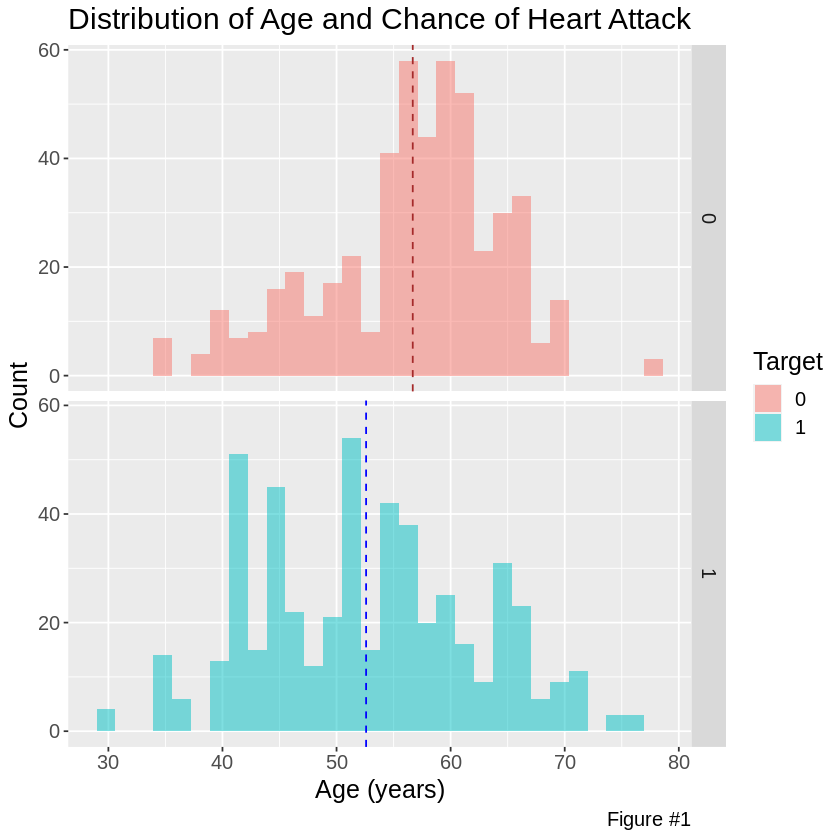

In [23]:
age_plot <- ggplot(heart_data_clean, aes(x = age, fill = target)) + 
    geom_histogram(alpha = 0.5, position = "identity") +
    geom_vline(data = filter(heart_data_clean, target == 0), aes(xintercept = mean(filter(heart_data_clean,  target == 0)$age)),
             color = "brown", linetype = "dashed") +
    geom_vline(data = filter(heart_data_clean, target == 1), aes(xintercept = mean(filter(heart_data_clean,  target == 1)$age)),
             color = "blue", linetype = "dashed") +
    facet_grid(rows = vars(target)) +
    labs(x = "Age (years)", y="Count", fill = "Target", caption = "Figure #1") +
    ggtitle("Distribution of Age and Chance of Heart Attack") +
    theme(text = element_text(size = 15))
age_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



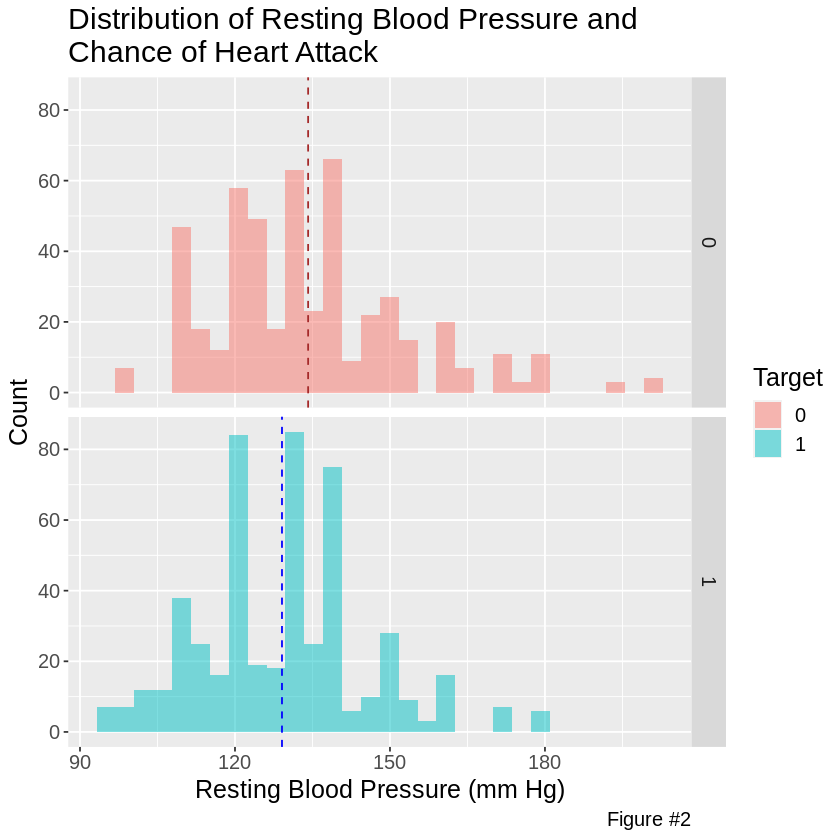

In [24]:
trestbps_plot <- ggplot(heart_data_clean, aes(x = trestbps, fill = target)) + 
    geom_histogram(alpha = 0.5, position = "identity") + 
    geom_vline(data = filter(heart_data_clean, target == 0), aes(xintercept = mean(filter(heart_data_clean,  target == 0)$trestbps)),
             color = "brown", linetype = "dashed") +
    geom_vline(data = filter(heart_data_clean, target == 1), aes(xintercept = mean(filter(heart_data_clean,  target == 1)$trestbps)),
             color = "blue", linetype = "dashed") +
    facet_grid(rows = vars(target)) +
    labs(x = "Resting Blood Pressure (mm Hg)", y="Count", fill = "Target", caption = "Figure #2") +
    ggtitle("Distribution of Resting Blood Pressure and \nChance of Heart Attack") +
    theme(text = element_text(size = 15))
trestbps_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



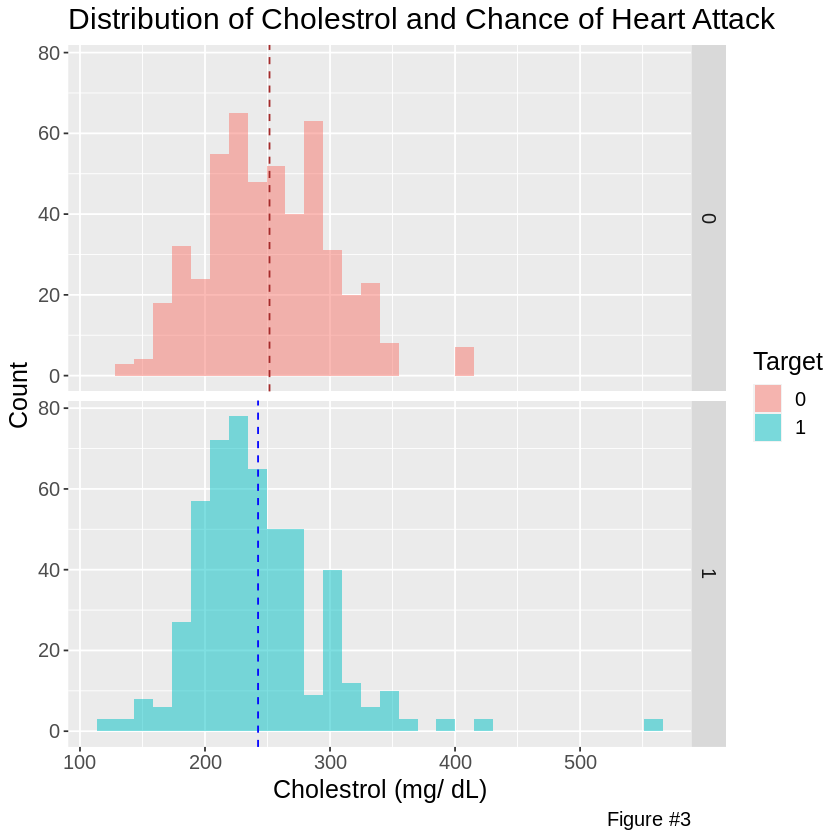

In [25]:
chol_plot <- ggplot(heart_data_clean, aes(x = chol, fill = target)) + 
    geom_histogram(alpha = 0.5, position = "identity") +
    geom_vline(data = filter(heart_data_clean, target == 0), aes(xintercept = mean(filter(heart_data_clean,  target == 0)$chol)),
             color = "brown", linetype = "dashed") +
    geom_vline(data = filter(heart_data_clean, target == 1), aes(xintercept = mean(filter(heart_data_clean,  target == 1)$chol)),
             color = "blue", linetype = "dashed") +
    facet_grid(rows = vars(target)) +
    labs(x = "Cholestrol (mg/ dL)", y="Count", fill = "Target", caption = "Figure #3") +
    ggtitle("Distribution of Cholestrol and Chance of Heart Attack") +
    theme(text = element_text(size = 15))
chol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



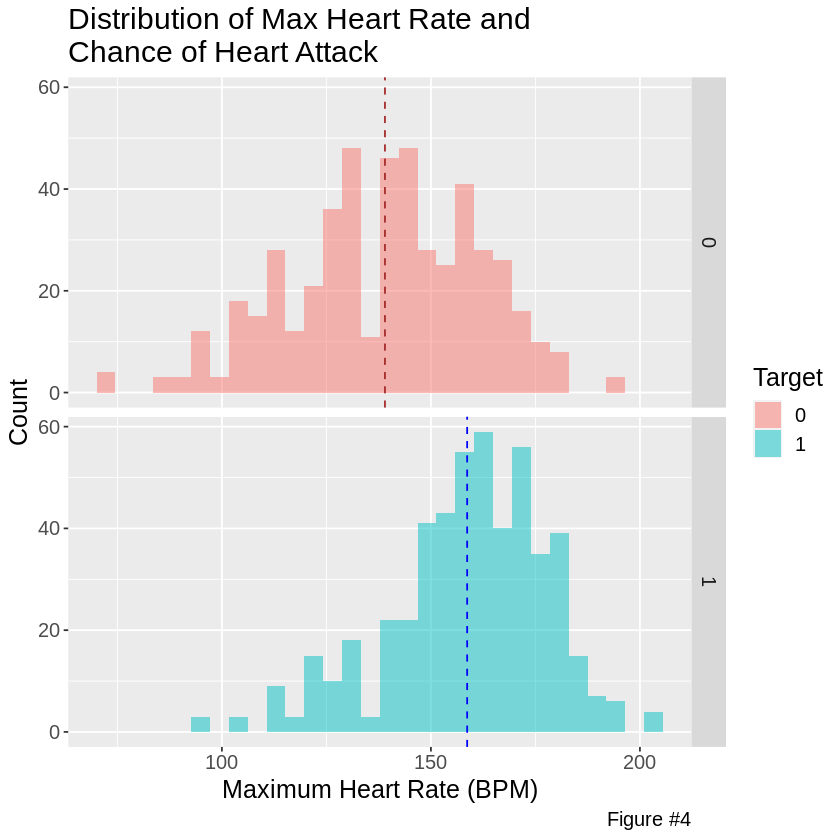

In [26]:
thalach_plot <- ggplot(heart_data_clean, aes(x = thalach, fill = target)) + 
    geom_histogram(alpha = 0.5, position = "identity") +
    geom_vline(data = filter(heart_data_clean, target == 0), aes(xintercept = mean(filter(heart_data_clean,  target == 0)$thalach)),
             color = "brown", linetype = "dashed") +
    geom_vline(data = filter(heart_data_clean, target == 1), aes(xintercept = mean(filter(heart_data_clean,  target == 1)$thalach)),
             color = "blue", linetype = "dashed") +
    facet_grid(rows = vars(target)) + 
    labs(x = "Maximum Heart Rate (BPM)", y="Count", fill = "Target", caption = "Figure #4") +
    ggtitle("Distribution of Max Heart Rate and \nChance of Heart Attack") +
    theme(text = element_text(size = 15))
thalach_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



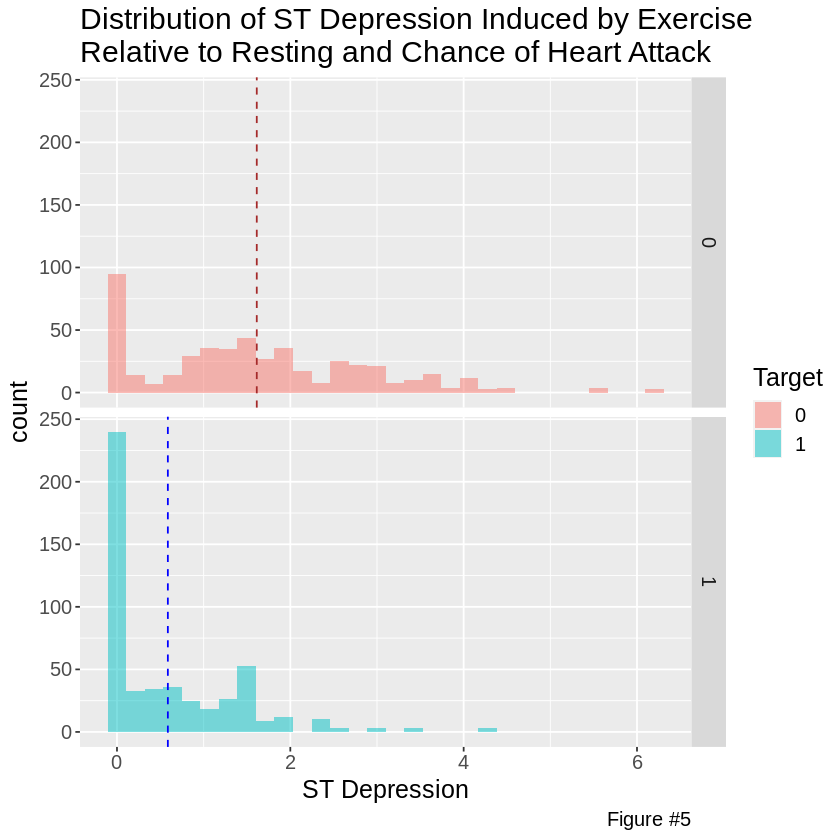

In [27]:
oldpeak_plot <- ggplot(heart_data_clean, aes(x = oldpeak, fill = target)) +
    geom_histogram(alpha = 0.5, position = "identity") +
    geom_vline(data = filter(heart_data_clean, target == 0), aes(xintercept = mean(filter(heart_data_clean,  target == 0)$oldpeak)),
             color = "brown", linetype = "dashed") +
    geom_vline(data = filter(heart_data_clean, target == 1), aes(xintercept = mean(filter(heart_data_clean,  target == 1)$oldpeak)),
             color = "blue", linetype = "dashed") +
    facet_grid(rows = vars(target)) +
    labs(x = "ST Depression", fill = "Target", caption = "Figure #5") +
    ggtitle("Distribution of ST Depression Induced by Exercise \nRelative to Resting and Chance of Heart Attack") +
    theme(text = element_text(size = 15))
oldpeak_plot

#### Summary Table

In [28]:
summary_table <- heart_data_clean |>
    group_by(target) |>
    summarize(mean_age = mean(age, na.rm = TRUE),
              mean_trestbps = mean(trestbps,na.rm = TRUE),
              mean_chol = mean(chol,na.rm = TRUE),
              mean_thalach = mean(thalach,na.rm = TRUE),
              mean_oldpeak = mean(oldpeak,na.rm = TRUE),
              count = n())
summary_table

target,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpeak,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,56.67951,134.1562,251.6065,139.0041,1.6129817,493
1,52.59055,129.0965,242.4370,158.6693,0.5870079,508


Table 3: Mean values of each predictor for high and low risk of heart disease

In [29]:
missing_table <- data.frame(Column_Names = colnames(heart_data_clean), 
                            Missing_Values = colSums(is.na(heart_data_clean)))
missing_table

,Column_Names,Missing_Values
,<chr>,<dbl>
age,age,0
trestbps,trestbps,0
chol,chol,0
thalach,thalach,0
oldpeak,oldpeak,0
target,target,0


Table 4: Number of missing values for each predictor

We do not have any null or missing values in the dataset.

### <mark> Section 3: KNN Classification

#### Splitting the Data Into Training and Testing Sets

In [30]:
set.seed(2000)
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#### Creating a Recipe That Centers and Scales All Predictor Variables

In [31]:
heart_recipe <- recipe(target ~ age + trestbps + chol + thalach + oldpeak , data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

#### Performing 5 Fold Cross Validation to Find Best k Value

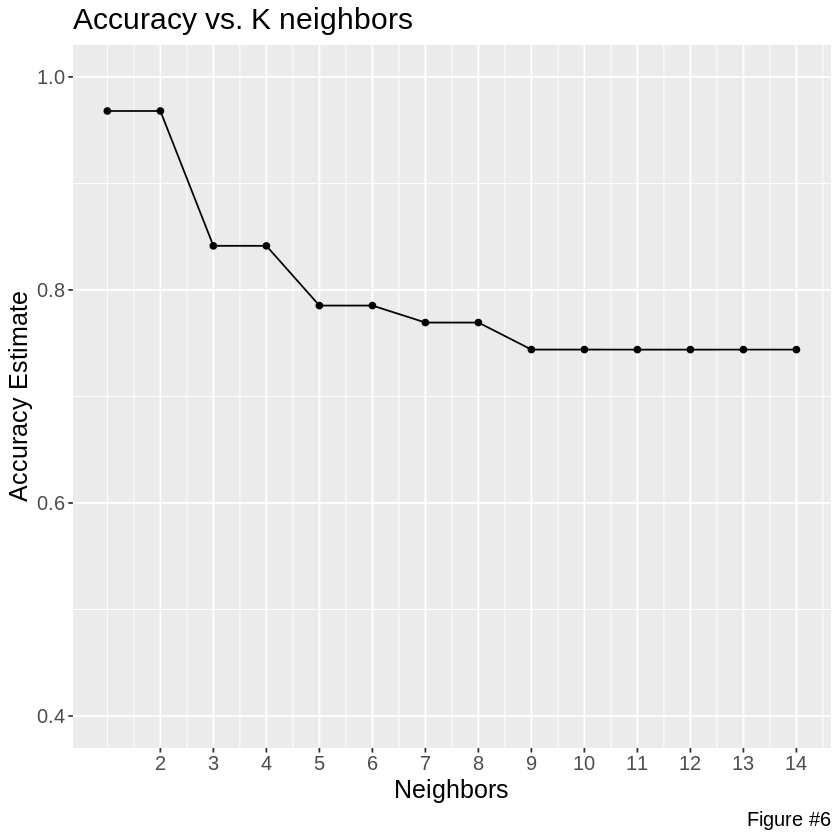

In [32]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = target)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")
k_vals <- tibble(neighbors = seq(from = 1, to = 14, by = 1))

knn_results <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold , grid = k_vals) |>
       collect_metrics()
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", caption = "Figure #6") +
       ggtitle("Accuracy vs. K neighbors") +
       theme(text = element_text(size = 15)) +
       scale_x_continuous(breaks = seq(2, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k

Notice that k = 2 results in the highest accuracy.

#### Using k = 2 to Predict on the Testing data and Compute the Accuracy of the Model

In [17]:
heart1_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
       set_engine("kknn") |>
       set_mode("classification")

heart1_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart1_spec) |>
       fit(data = heart_train)
heart_predictions <- predict(heart1_fit , heart_test) |>
       bind_cols(heart_test)

heart_metrics <- heart_predictions |>
         metrics(truth = target, estimate = .pred_class) |>
filter(.metric=="accuracy")
head(heart_predictions)
heart_metrics

.pred_class,age,trestbps,chol,thalach,oldpeak,target
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,70,145,174,125,2.6,0
0,62,138,294,106,1.9,0
1,58,100,248,122,1.0,1
0,46,120,249,144,0.8,0
1,71,112,149,125,1.6,1
1,34,118,210,192,0.7,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9721116


Table 5: Predictions made on the testing data set

Table 6: Accuracy estimate of the classifier

#### Confusion Matrix

In [18]:
heart_mat <- heart_predictions |> 
       conf_mat(truth = target, estimate = .pred_class)
heart_mat

          Truth
Prediction   0   1
         0 120   3
         1   4 124

## Expected outcomes and significance

**What do you expect to find?**

We expect to use age, resting blood pressure, cholesterol, maximum heart rate and ST depression to predict whether an individual/patient will have low or high chance of heart attack. 

**What impact could such findings have?**

These findings could be helpful in the medical sector for predicting heart attack instances in patients and allow them to recieve proper precautionary treatments early on to prevent it from happening.

**What future questions could this lead to?**

Many other questions can follow this one. Such as:
* What are the main risk factors associated with heart attacks?
* Are there any early warning signs that can indicate an impending heart attack?
* Can machine learning models be integrated into daily medical practice to improve early detection and prevention of heart attacks?
* What impact could integrating heart attack prediction models in the healthcare sector have on healthcare costs and patient health?

## <mark><font color="blue"> Discussion

We performed KNN classification on individuals with a high and low chance of heart attack based on their age, resting blood pressure, cholesterol levels, maximum heart rate, and distribution of ST depression induced by exercise. In the preliminary data exploartion, we found that individuals falling under the target category of `1` (high risk of heart disease), had a lower average age, resting blood pressure, cholesterol and ST depression induced by exercise. But the average maximum heart rate was higher. This is summarized in Table 3. From these observations, we predicted that individuals following these patterns will be classified as having a high risk of heart disease. The opposite would be classified as having a low risk of heart disease. Table 4 also shows that there were no missing values in all five of the predictors we used in this classification.

After running the KNN classification algorithm on the data, we found that individuals with lower age, higher maximum heart rate, and lower distribution of ST depression induced by exercises were more susceptible to having heart attacks, just as we predicted. Resting blood pressure and cholesterol levels were approximately the same among the two groups, although individuals at higher risk of heart attack had a slightly lower average resting blood pressure (Figure 2) and cholesterol (Figure 3) level. The KNN algorithm had a prediction accuracy of around 97% (Table 6), meaning it could accurately predict the patient's diagnosis almost every time. This prediction accuracy is higher than accuracy of a classification made with this data set in the past, which had an accuracy of 77%. The confusion matrix shows that it accurately predicted 120 observations as low risk and 124 as high risk of heart disease, while 4 were inaccurately predicted as high risk when they are actually individuals with a low risk of heart disease. In addition, 3 were inaccurately predicted as low risk when they are actually individuals with a high risk of heart disease. Classifying a patient as low risk when they are actually at high risk would be the worst scenario, but as seen from the confusion matrix, this model only wrongly predicts 3 of these cases. Which indicates that this classifier is relatively safe/trustworthy for predicting the heart disease risk in patients. Furthermore, the proportion of individuals at low and high risk is roughly the same (Table 3), hence the majority classifier problem is not present in our data. Thus further strengthening the reliability of the prediction accuracy produced.

The majority of the results produced align with our predictions, as individuals with a higher maximum heart rate are generally at more risk towards heart attacks. However, it was surprising to see that individuals with a high risk of heart attack had a lower mean age (observed in Figure 1). The motivation behind choosing age, resting blood pressure, cholesterol levels, maximum heart rate, and distribution of ST depression induced by exercise was due to these factors seemingly having a large impact on one's risk of heart attacks, and we expected these factors to greatly differ between the individuals at high and low risk of heart attack. Therefore, it was surprising to see that resting blood pressure and cholesterol levels stayed almost consistent among the two groups. Additionally, the high accuracy of the KNN classifier was slightly surprising to see, as it is generally uncommon to see KNN classifiers with accuracies above 95%. 

These findings and the classification model built could be helpful in the medical sector for predicting heart attack instances in patients. It can possibly identify patient risks early on, thus better preparing medical professionals and the patient with proper precautionary steps or treatments to prevent heart dieseases from happening. Future questions relating to this project could be:
* What are the main risk factors associated with heart attacks?
* Are there any early warning signs that can indicate an impending heart attack?
* Can machine learning models be integrated into daily medical practice to improve early detection and prevention of heart attacks?
* What impact could integrating heart attack prediction models in the healthcare sector have on healthcare costs and patient health?

## <mark><font color="blue"> Discussion References

Fitriyani, N. L., Syafrudin, M., Alfian, G., &amp; Rhee, J. (2020). HDPM: An effective heart disease prediction model for a clinical decision support system. IEEE Access, 8, 133034–133050. https://doi.org/10.1109/access.2020.3010511 

*Heart Disease Data Set*. UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved April 7, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

M. Shouman, T. Turner and R. Stocker, "Using data mining techniques in heart disease diagnosis and treatment", *2012 Japan-Egypt Conference on Electronics, Communications and Computers*, pp. 173-177, 2012. Retrieved April 11, 2023, from https://doi.org/10.1109/JEC-ECC.2012.6186978

S. Mohan, C. Thirumalai and G. Srivastava, "Effective Heart Disease Prediction Using Hybrid Machine Learning Techniques," *IEEE Access, vol. 7*, pp. 81542-81554, 2019. Retrieved April 11, 2023, from https://doi.org/10.1109/ACCESS.2019.2923707